# Webscraping - Collecting data from internet

In [4]:
from warnings import filterwarnings

filterwarnings("ignore")

### Get the HTML content of website

In [5]:
url = "https://en.wikipedia.org/wiki/World_population"
print(url)

https://en.wikipedia.org/wiki/World_population


In [6]:
import requests

In [7]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

In [8]:
response = requests.get(url, headers=headers)
response

<Response [200]>

### 200 means ok response

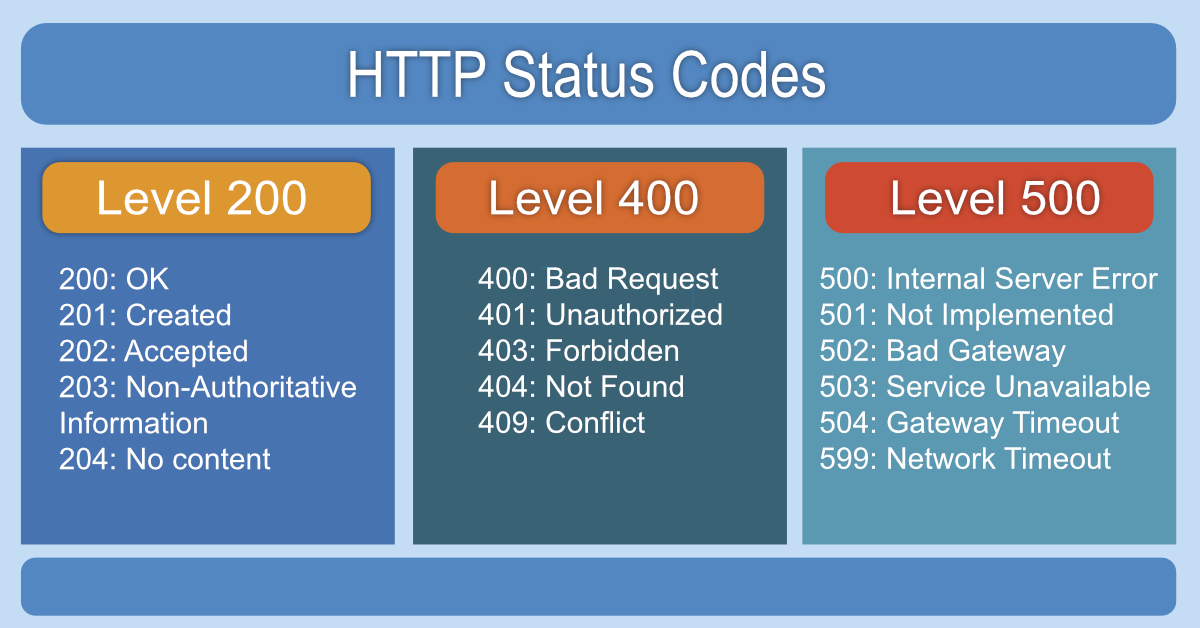


In [9]:
print(response.content[0:100])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la'


### Use beautiful soup to find particular elements

In [10]:
from bs4 import BeautifulSoup

In [11]:
soup = BeautifulSoup(response.content)

In [12]:
type(soup)

bs4.BeautifulSoup

In [13]:
title_tag = soup.find("title")
title_tag

<title>World population - Wikipedia</title>

In [14]:
title_tag.text

'World population - Wikipedia'

### Get the H1 tage with a particular class

In [15]:
h1_tag = soup.find("h1", class_="firstHeading")
h1_tag

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [16]:
h1_tag = soup.find("h1", id="firstHeading")
h1_tag

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [17]:
h1_tag.text

'World population'

### Getting all subheadings


use find_all to get multiple tags

In [18]:
subheading_tags = soup.find_all("div", class_="mw-heading")
subheading_tags

[<div class="mw-heading mw-heading2"><h2 id="History">History</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Prehistoric_patterns">Prehistoric patterns</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ancient_and_post-classical_history">Ancient and post-classical history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Modern_history">Modern history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="20th_century">20th century</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Milestones_by_the_billions">Milestones by the billions</h3></div>,
 <div class="mw-heading mw-heading2"><h2 id="Global_demographics">Global demographics</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Population_by_region">Population by region</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Largest_populations_by_country">Largest populations by country</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ten_most_populous_countries">Ten most populous coun

In [19]:
subheading_tags[0].text

'History'

In [20]:
subheading_text = [tag.text for tag in subheading_tags]
subheading_text

['History',
 'Prehistoric patterns',
 'Ancient and post-classical history',
 'Modern history',
 '20th century',
 'Milestones by the billions',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Ten most populous countries',
 'Most densely populated countries',
 'Fluctuation',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Mathematical approximations',
 'Years for world population to double',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Citations',
 'General and cited sources',
 'Further reading',
 'External links']

### Getting and saving the paragraphs

In [21]:
p_tags = soup.find_all("p")
p_tags[0:3]

[<p class="mw-empty-elt">
 </p>,
 <p>In <a href="/wiki/Demographics_of_the_world" title="Demographics of the world">world demographics</a>, the <b>world population</b> is the total number of <a href="/wiki/Human" title="Human">humans</a> currently alive. It was estimated by the <a href="/wiki/United_Nations" title="United Nations">United Nations</a> to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human <a href="/wiki/Prehistory" title="Prehistory">prehistory</a> and <a href="/wiki/Human_history" title="Human history">history</a> for the human population to reach a billion and only 218 more years to reach 8 billion.
 </p>,
 <p>The human population has experienced <a href="/wiki/Population_growth" title="Population growth">continuous growth</a> following the <a href="/wiki/Great_Famine_of_1315%E2%80%931317" title="Great Famine of 1315–1317">Great Famine of 1315–1317</a> and the end of the <a href="/wiki/Black_Death" title="Black Death">Black Death</a>

In [22]:
p_text = [tag.text for tag in p_tags]
p_text[0:2]

['\n',
 'In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 more years to reach 8\xa0billion.\n']

In [23]:
p_str = "\n\n".join(p_text)
print(p_str[0:100])




In world demographics, the world population is the total number of humans currently alive. It was


In [24]:
# Save in .txt file
with open("WorldPopulation.txt", "w", encoding="utf-8") as f:
    f.write(p_str)

#### Getting all image links

In [25]:
a_tags = soup.find_all("a", class_="mw-file-description")
a_tags

[<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="263" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/500px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/525px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/700px-World_Population_Prospects.svg.png 2x" width="350"/></a>,
 <a class="mw-file-description" href="/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png"><img class="mw-file-element" data-file-height="7747" data-file-width="5201" decoding="async" height="447" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png/330px-Illustration_of_contempor

In [26]:
a_tags[0]

<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="263" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/500px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/525px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/700px-World_Population_Prospects.svg.png 2x" width="350"/></a>

In [27]:
a_tags[0].get("href")

'/wiki/File:World_Population_Prospects.svg'

In [28]:
home_page = "https://en.wikipedia.org"
home_page

'https://en.wikipedia.org'

In [29]:
home_page + a_tags[0].get("href")

'https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg'

In [30]:
img_links = [home_page + tag.get("href") for tag in a_tags]
img_links

['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org/wiki/File:2020_1million_cities.jpg',
 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org/wiki/File:World_population_counter,_Eureka,_Halifax,_

### Get all the tables

In [31]:
%pip install lxml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
table_tags = soup.find_all("table", class_="wikitable")
table_tags[0]

<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
<caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_61-0"><a href="#cite_note-:6-61"><span class="cite-bracket">[</span>61<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
</caption>
<tbody><tr>
<th scope="row">Population
</th>
<th scope="col">1
</th>
<th scope="col">2
</th>
<th scope="col">3
</th>
<th scope="col">4
</th>
<th scope="col">5
</th>
<th scope="col">6
</th>
<th scope="col">7
</th>
<th scope="col">8
</th>
<th scope="col">9
</th>
<th scope="col">10
</th></tr>
<tr>
<th scope="row">Year
</th>
<td>1804</td>
<td>1927</td>
<td>1960</td>
<td>1974</td>
<td>1987</td>
<td>1999</td>
<td>2011</td>
<td>2022</td>
<td><i>2037</i></td>
<td><i>2057</i>
</td></tr>
<tr>
<th scope="row">Years elapsed
</th>
<td>–</td>
<td>123</td>
<td>33</td>
<td>14</td>
<td>13</td>
<td>12</td>
<td>12</td>
<td>11</td>
<td><i>15</i></td>
<td><i>20<

In [33]:
import pandas as pd

In [34]:
df1 = pd.read_html(str(table_tags[0]))[0]
df1

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,–,123,33,14,13,12,12,11,15,20


In [35]:
dfs = []

for table in table_tags:
    r = pd.read_html(str(table))[0]
    display(r)
    dfs.append(r)

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,–,123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[89],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.4%,14 Apr 2023,UN projection[92]
1,China,1409670000,17.2%,17 Jan 2024,National annual estimate[93]
2,United States,338403277,4.13%,27 Sep 2025,National population clock[94]
3,Indonesia,278696200,3.40%,1 Jul 2023,National annual estimate[95]
4,Pakistan,229488994,2.80%,1 Jul 2022,UN projection[96]
5,Brazil,219728950,2.68%,27 Sep 2025,National population clock[97]
6,Nigeria,216746934,2.64%,1 Jul 2022,UN projection[96]
7,Bangladesh,168220000,2.05%,1 Jul 2020,Annual Population Estimate[98]
8,Russia,147190000,1.79%,1 Oct 2021,2021 preliminary census results[99]
9,Mexico,128271248,1.56%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][102],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[103]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[119]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[120]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin Am./ Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2024,8160,"4,810 (58.9%)","1,520 (18.6%)",745 (9.1%),663 (8.1%),385 (4.7%),46 (0.6%)
2,2050,9660,"5,280 (54.7%)","2,470 (25.6%)",703 (7.3%),730 (7.6%),426 (4.4%),57 (0.6%)
3,2075,10250,"5,100 (49.8%)","3,290 (32.1%)",636 (6.2%),698 (6.8%),452 (4.4%),66 (0.6%)
4,2100,10180,"4,610 (45.3%)","3,810 (37.4%)",592 (5.8%),613 (6.0%),475 (4.7%),73 (0.7%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[151],c. 2100[151]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


In [36]:
len(dfs)

15

In [37]:
dfs[0]

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,–,123,33,14,13,12,12,11,15,20


In [38]:
dfs[1]

,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


In [39]:
dfs[1].to_csv("Population.csv", index=False)

In [40]:
import pandas as pd

t = pd.read_csv("Population.csv")
t

,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


## Create a class to scrape any wikiepdia website

In [41]:
import requests
from bs4 import BeautifulSoup

In [46]:
class WikiScraper:

    def __init__(self, url: str):
        self.url = url
        self.home_page = "https://en.wikipedia.org"
        headers = headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
        }
        self.response = requests.get(url, headers=headers)
        self.response.raise_for_status()
        self.soup = BeautifulSoup(self.response.content)

    def get_title(self):
        title_tag = self.soup.find("title")
        return title_tag.text

    def get_h1(self):
        h1_tag = self.soup.find("h1", class_="firstHeading")
        return h1_tag.text

    def get_subheadings(self):
        sub_tags = self.soup.find_all("div", class_="mw-heading")
        sub_text = [tag.text for tag in sub_tags]
        return sub_text

    def get_paras(self):
        p_tags = self.soup.find_all("p")
        p_list = [tag.text for tag in p_tags]
        p_str = "\n\n".join(p_list)
        return p_str

    def get_image_links(self):
        a_tags = self.soup.find_all("a", class_="mw-file-description")
        img_links = [self.home_page + tag.get("href") for tag in a_tags]
        return img_links

    def get_all_tables(self):
        table_tags = self.soup.find_all("table", class_="wikitable")
        dfs = []
        for table in table_tags:
            r = pd.read_html(str(table))[0]
            display(r)
            dfs.append(r)
        # Return the dfs
        return dfs

In [47]:
url2 = "https://en.wikipedia.org/wiki/Data_science"
print(url2)

https://en.wikipedia.org/wiki/Data_science


In [48]:
s1 = WikiScraper(url=url2)
type(s1)

__main__.WikiScraper

In [49]:
s1.get_title()

'Data science - Wikipedia'

In [50]:
s1.get_h1()

'Data science'

In [51]:
paras = s1.get_paras()
print(paras[0:100])




Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing


In [52]:
s1.get_image_links()

['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
 'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
 'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg']

In [53]:
s1.get_all_tables()

[]

In [54]:
url

'https://en.wikipedia.org/wiki/World_population'

In [55]:
s2 = WikiScraper(url=url)
s2.get_all_tables()

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,–,123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[89],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.4%,14 Apr 2023,UN projection[92]
1,China,1409670000,17.2%,17 Jan 2024,National annual estimate[93]
2,United States,338403277,4.13%,27 Sep 2025,National population clock[94]
3,Indonesia,278696200,3.40%,1 Jul 2023,National annual estimate[95]
4,Pakistan,229488994,2.80%,1 Jul 2022,UN projection[96]
5,Brazil,219728950,2.68%,27 Sep 2025,National population clock[97]
6,Nigeria,216746934,2.64%,1 Jul 2022,UN projection[96]
7,Bangladesh,168220000,2.05%,1 Jul 2020,Annual Population Estimate[98]
8,Russia,147190000,1.79%,1 Oct 2021,2021 preliminary census results[99]
9,Mexico,128271248,1.56%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][102],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[103]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[119]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[120]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin Am./ Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2024,8160,"4,810 (58.9%)","1,520 (18.6%)",745 (9.1%),663 (8.1%),385 (4.7%),46 (0.6%)
2,2050,9660,"5,280 (54.7%)","2,470 (25.6%)",703 (7.3%),730 (7.6%),426 (4.4%),57 (0.6%)
3,2075,10250,"5,100 (49.8%)","3,290 (32.1%)",636 (6.2%),698 (6.8%),452 (4.4%),66 (0.6%)
4,2100,10180,"4,610 (45.3%)","3,810 (37.4%)",592 (5.8%),613 (6.0%),475 (4.7%),73 (0.7%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[151],c. 2100[151]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


[      Population     1     2     3     4     5     6     7     8     9    10
 0           Year  1804  1927  1960  1974  1987  1999  2011  2022  2037  2057
 1  Years elapsed     –   123    33    14    13    12    12    11    15    20,
                                Region  2022 (percent)  2030 (percent)  \
 0                  Sub-Saharan Africa  1,152 (14.51%)  1,401 (16.46%)   
 1    Northern Africa and Western Asia     549 (6.91%)     617 (7.25%)   
 2      Central Asia and Southern Asia  2,075 (26.13%)  2,248 (26.41%)   
 3  Eastern Asia and Southeastern Asia  2,342 (29.49%)  2,372 (27.87%)   
 4         Europe and Northern America  1,120 (14.10%)  1,129 (13.26%)   
 5     Latin America and the Caribbean     658 (8.29%)     695 (8.17%)   
 6           Australia and New Zealand      31 (0.39%)      34 (0.40%)   
 7                             Oceania      14 (0.18%)      15 (0.18%)   
 8                               World            7942            8512   
 
    2050 (percent)  
 0

In [56]:
urls = [
    "https://en.wikipedia.org/wiki/World_population",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://en.wikipedia.org/wiki/Python_(programming_language)",
    "https://en.wikipedia.org/wiki/Rust_(programming_language)",
    "https://en.wikipedia.org/wiki/Data_analysis",
]

In [57]:
urls

['https://en.wikipedia.org/wiki/World_population',
 'https://en.wikipedia.org/wiki/Data_science',
 'https://en.wikipedia.org/wiki/Python_(programming_language)',
 'https://en.wikipedia.org/wiki/Rust_(programming_language)',
 'https://en.wikipedia.org/wiki/Data_analysis']

In [58]:
d = {}

for i in urls:
    scraper = WikiScraper(url=i)
    print(f"Scraping : {scraper.url}")
    h1 = scraper.get_h1()
    img = scraper.get_image_links()
    d[h1] = img
    print(d[h1])
    print("=" * 60 + "\n")

# Printing final dictionary
print(d)

Scraping : https://en.wikipedia.org/wiki/World_population
['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg', 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png', 'https://en.wikipedia.org/wiki/File:2020_1million_cities.jpg', 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg', 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg', 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png', 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png', 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg', 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg', 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg', 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg', 'https://en.wikipedia.org/wiki/F

In [59]:
d

{'World population': ['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
  'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
  'https://en.wikipedia.org/wiki/File:2020_1million_cities.jpg',
  'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
  'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
  'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
  'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
  'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
  'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
  'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
  'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
  'https://en.wikipedia.org/wiki/File:World_popul

In [60]:
import json

In [61]:
with open("links.json", "w") as f:
    json.dump(d, f, indent=4)